In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
%pylab inline
import os, re, csv, itertools, mpld3, lda, pickle
import pandas as pd
import numpy as np

from collections import defaultdict, Counter
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# NLTK Imports
import nltk
from nltk.chunk import ne_chunk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
#from nltk.corpus import stopwords

# sklearn Imports
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

# gensim Imports
from gensim import corpora, models, similarities, matutils
from gensim.models import Word2Vec

import texthelperfunctions_jeff as th
from fileloadinghelper_jeff import *

Populating the interactive namespace from numpy and matplotlib


## Load and Clean Text

In [3]:
# load an array containing all 7 potter books
#arrayofpotterbooks = loadonedirectoryasarray('BooksInText/harrypotter/')
# convert the books to dataframes
#arrayofpotterbookdfs = loadpotterdataframes()
# tokenize the array of books
#arrayoftokenizedpotterbooks = tokenizebooks(arrayofpotterbooks)
# create a tree of tagged parts of speech for each book in the array
#arrayofpottertrees = tagandtree(arrayoftokenizedpotterbooks)

In [4]:
# pickle.dump(arrayofpotterbooks,open("arrayofpotterbooks.pkl","wb"))
# pickle.dump(arrayoftokenizedpotterbooks,open("arrayoftokenizedpotterbooks.pkl","wb"))
# pickle.dump(arrayofpottertrees,open("arrayofpottertrees.pkl","wb"))

In [5]:
arrayofpotterbooks = pickle.load(open("arrayofpotterbooks.pkl","rb"))
arrayoftokenizedpotterbooks = pickle.load(open("arrayoftokenizedpotterbooks.pkl","rb"))
arrayofpottertrees = pickle.load(open("arrayofpottertrees.pkl","rb"))

In [6]:
arrayofpotterbooks[0][200:500]

'ed in anything strange or mysterious  because they just didnt hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings which made drills. He was a big beefy man with hardly any neck although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly tw'

## Load Entire Directories of Books into One File

In [7]:
# load the ones you need
bartbooksfile = pickle.load(open("./picklefiles/bartbooksfile.pkl","rb"))
bartbooksarray = pickle.load(open("./picklefiles/bartbooksarray.pkl","rb"))
potterbooksfile = pickle.load(open("./picklefiles/potterbooksfile.pkl","rb"))
potterbooksarray = pickle.load(open("./picklefiles/potterbooksarray.pkl","rb"))
daisybooksfile = pickle.load(open("./picklefiles/daisybooksfile.pkl","rb"))
daisybooksarray = pickle.load(open("./picklefiles/daisybooksarray.pkl","rb"))
doomspellbooksfile = pickle.load(open("./picklefiles/doomspellbooksfile.pkl","rb"))
doomspellbooksarray = pickle.load(open("./picklefiles/doomspellbooksarray.pkl","rb"))
# middlegradebooksfile = pickle.load(open("./picklefiles/middlegradebooksarray.pkl","rb"))
# middlegradebooksarray = pickle.load(open("./picklefiles/middlegradebooksarray.pkl","rb"))

In [8]:
# potterbookstree = ne_chunk(pos_tag(word_tokenize(potterbooksfile)))
# pickle.dump(potterbookstree,open("./picklefiles/potterbookstree.pkl","wb"))
potterbookstree = pickle.load(open("./picklefiles/potterbookstree.pkl","rb"))

In [9]:
print(len(bartbooksfile),len(potterbooksfile),len(daisybooksfile),len(doomspellbooksfile)) #,len(middlegradebooksfile))

2385540 6092106 203086 935161


In [10]:
# this is a lot of text and a lot of processing - takes about 40 minutes
# bigarray = th.tagandtree(tokenizebooks([bartbooks,potterbooks,doomspellbooks,middlegradebooks]))

# this portion takes about ...
# bartpotterdoom = th.tagandtree(th.tokenizebooks([bartbooks,potterbooks,doomspellbooks]))

In [11]:
# pickle.dump(bigarray,open("bigarray.pkl","wb"))
# pickle.dump(bartpotterdoom,open("bartpotterdoom.pkl","wb"))
# pickle.dump(arrayofpotterbooks,open("arrayofpotterbooks.pkl","wb"))
# pickle.dump(arrayoftokenizedpotterbooks,open("arrayoftokenizedpotterbooks.pkl","wb"))
# pickle.dump(arrayofpottertrees,open("arrayofpottertrees.pkl","wb"))

In [12]:
bartpotterdoom = pickle.load(open("bartpotterdoom.pkl","rb"))
bigarray = pickle.load(open("bigarray.pkl","rb"))
arrayofpotterbooks = pickle.load(open("arrayofpotterbooks.pkl","rb"))
arrayoftokenizedpotterbooks = pickle.load(open("arrayoftokenizedpotterbooks.pkl","rb"))
arrayofpottertrees = pickle.load(open("arrayofpottertrees.pkl","rb"))

## Data Exploration and Fun With Parts Of Speech

In [13]:
#composition of bigarray: [bartbooks,potterbooks,doomspellbooks,middlegradebooks]

In [14]:
barttreelist = pickle.load(open("./picklefiles/barttreelist.pkl","rb"))
pottertreelist = pickle.load(open("./picklefiles/pottertreelist.pkl","rb"))
doomtreelist = pickle.load(open("./picklefiles/doomtreelist.pkl","rb"))
middletreelist = pickle.load(open("./picklefiles/middletreelist.pkl","rb"))
middlegradearray = pickle.load(open("./picklefiles/middlegradearray.pkl","rb"))

In [15]:
middlegradearray[0][800:850]

'dspeakers blaring porters rushing about shouting a'

In [16]:
# not using for the moment - too big
# middletreelistarray = pickle.load(open("middletreelistarray.pkl","rb"))
# middletreelistarray[2][25]

In [17]:
barttreelist[365:371]

[('indistinct', 'JJ'),
 ('black', 'JJ'),
 ('shadows', 'NNS'),
 ('writhed', 'VBD'),
 ('and', 'CC'),
 ('roiled', 'VBD')]

In [18]:
adjectives = ['JJ','JJR','JJS','RB','RBR','RBS']
nouns = ['NN','NNS'] # not including proper nouns
verbs = ['VB','VBD','VBG','VBN','VBP','VBZ']

In [19]:
# get all matching parts of speech
bartadjectives = th.getallpos(barttreelist,adjectives)
bartnouns = th.getallpos(barttreelist,nouns)
bartverbs = th.getallpos(barttreelist,verbs)

In [20]:
bartnouns[50:55]

['surface', 'colony', 'toadstools', 'wicks', 'room']

In [21]:
bartnouns[405:410]

['branch', 'view', 'villas', 'street', 'protection']

In [22]:
bartverbs[410:415]

['rigged', 'didn’t', 'extended', 'forming', 'handle']

In [23]:
# TF-IDF first and then filter for adjectives which should yield a good first pass on sentiment and intensity
# Get a sentiment map for nouns

## Get the main characters of the book

In [24]:
actionwords = ['said','laughed','cried','thought','felt']
notpeople = ['He','She','It','Yes','No','Yeah','You','Er','Ive',
            'Oh','So','They','Hi','Ah','Well','Right','Nothing',
            'Good','Sorry','We','Nobody','The','Excellent','Thanks',
            'Hogwarts']

In [25]:
potmainchars = th.getmaincharacters(arrayofpottertrees[0],30,notpeople)
potmainchars[:15]

[('harry', 1117),
 ('ron', 374),
 ('hagrid', 281),
 ('hermione', 192),
 ('snape', 106),
 ('dudley', 105),
 ('uncle vernon', 94),
 ('neville', 76),
 ('dumbledore', 72),
 ('malfoy', 56),
 ('harrys', 55),
 ('aunt petunia', 49),
 ('wood', 39),
 ('filch', 38),
 ('professor mcgonagall', 38)]

In [26]:
# 'findcharacters' is an alternative way of finding characters using action words
potterchars = th.findcharacters(potterbooksfile,actionwords,notpeople)
pottercounts = Counter(potterchars)

In [27]:
# This gives a sense of who the "active" characters are
# i.e. the ones with "agency"
pottopchars = pottercounts.most_common(30)
pottopchars[:15]

[('Harry', 844),
 ('Hermione', 142),
 ('Ron', 128),
 ('Dumbledore', 63),
 ('Hagrid', 44),
 ('Snape', 36),
 ('Weasley', 30),
 ('Potter', 30),
 ('Lupin', 22),
 ('Malfoy', 22),
 ('Sirius', 17),
 ('Fred', 16),
 ('Ginny', 12),
 ('Voldemort', 12),
 ('Neville', 10)]

### Get combinations of characters

In [28]:
# get all possible combinations of top n characters, in groups of size k
def getCombos(nameslist,k=2):
    names = [x[0] for x in nameslist]
    return list(itertools.combinations(names,k)) #all name combinations

In [29]:
[x[0] for x in pottopchars][:5]

['Harry', 'Hermione', 'Ron', 'Dumbledore', 'Hagrid']

In [30]:
pottoppairs = getCombos(pottopchars,2)
potmainpairs = getCombos(potmainchars,2)

pottoptrips = getCombos(pottopchars,3)
potmaintrips = getCombos(potmainchars,3)

In [31]:
pottoppairs[35:45]

[('Hermione', 'Lupin'),
 ('Hermione', 'Malfoy'),
 ('Hermione', 'Sirius'),
 ('Hermione', 'Fred'),
 ('Hermione', 'Ginny'),
 ('Hermione', 'Voldemort'),
 ('Hermione', 'Neville'),
 ('Hermione', 'Moody'),
 ('Hermione', 'George'),
 ('Hermione', 'Umbridge')]

In [32]:
pottoptrips[404:409]

[('Harry', 'Slughorn', 'Look'),
 ('Harry', 'Petunia', 'Look'),
 ('Hermione', 'Ron', 'Dumbledore'),
 ('Hermione', 'Ron', 'Hagrid'),
 ('Hermione', 'Ron', 'Snape')]

## Get words in vicinity of others

In [33]:
# get the words in front and back of a given word
felt_v = th.searchall(potterbooksfile,'felt',3,3)
loved_v = th.searchall(potterbooksfile, 'loved',3,3)
hated_v = th.searchall(potterbooksfile, 'hated',3,3)

In [34]:
harry_v = th.searchall(potterbooksfile, 'Harry',3,3)
ron_v = th.searchall(potterbooksfile, 'Ron',3,3)
hermione_v = th.searchall(potterbooksfile, 'Hermione',3,3)
hagrid_v = th.searchall(potterbooksfile, 'Hagrid',3,3)
snape_v = th.searchall(potterbooksfile, 'Snape',3,3)
malfoy_v = th.searchall(potterbooksfile, 'Malfoy',3,3)

In [35]:
print("Felt:")
print(felt_v[125:130])
print("Loved: ")
print(loved_v[:5])
print("Hated: ")
print(hated_v[20:25])
print("Snape:")
print(snape_v[30:35])

Felt:
[('his', 'great', 'surprise', 'warmth', 'spread', 'suddenly'), ('and', 'straw', 'Harry', 'better', 'since', 'the'), ('bustling', 'in', 'Harry', 'himself', 'going', 'red'), ('the', 'students', 'he', 'really', 'calm', 'for'), ('Harry', 'looking', 'around', 'he', 'was', 'home')]
Loved: 
[('to', 'have', 'been', 'so', 'deeply', 'even'), ('the', 'person', 'who', 'us', 'is', 'gone'), ('own', 'Bet', 'you', 'that', 'didn', 't'), ('his', 'massive', 'g', 'hands', 'All', 'righ'), ('scene', 'Peeves', 'always', 'chaos', 'As', 'the')]
Hated: 
[('him', 'how', 'she', 'him', 'what', 'a'), ('hair', 'Because', 'I', 'the', 'whole', 'lot'), ('could', 'easily', 'have', 'Harry', 'for', 'coming'), ('the', 'world', 'he', 'more', 'than', 'Snape'), ('two', 'teachers', 'he', 'most', 'It', 'was')]
Snape:
[('clutching', 'his', 'heart', 'bent', 'over', 'the'), ('141', 'your', 'dormitory', 'gave', 'Harry', 'a'), ('was', 'as', 'if', 'had', 'started', 'handing'), ('getting', 'warm', 'when', 'crossed', 'the', 'yard

## Classify words to predict whether a given character appears therein

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import cluster
from sklearn import linear_model, ensemble, tree, cross_validation
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition

from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
print(len(hagrid_v),len(malfoy_v))

1989 1328


In [38]:
# put the data in the right format
def format_X(vicinitytuples):
    result = []
    tupcounter = 0
    for i in range(int(len(vicinitytuples)/2)):
        #print(" ".join(vicinitytuples[i]+vicinitytuples[i+1]))
        result.append(" ".join(vicinitytuples[i]+vicinitytuples[i+1]))
    return result

### Predicting appearance of Malfoy or Hagrid based on a set of adjacent words

In [39]:
malfoy_X = format_X(malfoy_v)
hagrid_X = format_X(hagrid_v)
mh = malfoy_X + hagrid_X

In [40]:
y = np.append(np.ones(len(malfoy_X)), np.zeros(len(hagrid_X)))
data = mh # X #np.append(spam, ham)
target = y # np.append(np.ones(747), np.zeros(4827))

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.3)

log_reg = Pipeline([("count_vect", CountVectorizer()),("log_reg", LogisticRegression())])
rf = Pipeline([("count_vect", CountVectorizer()),("rf", RandomForestClassifier())])

log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.89357429718875503

In [41]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.81325301204819278

### Predicting appearance of Hermione or Ron based on a set of adjacent words

In [42]:
print(len(hermione_v),len(ron_v))

5259 6218


In [43]:
hermione_X = format_X(hermione_v)
ron_X = format_X(ron_v)
hero = hermione_X + ron_X

In [44]:
y2 = np.append(np.ones(len(hermione_X)), np.zeros(len(ron_X)))
data2 = hero # X #np.append(spam, ham)
target2 = y2 # np.append(np.ones(747), np.zeros(4827))

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, random_state=42, test_size=0.3)

log_reg2 = Pipeline([("count_vect", CountVectorizer()),("log_reg", LogisticRegression())])
rf2 = Pipeline([("count_vect", CountVectorizer()),("rf", RandomForestClassifier())])

log_reg2.fit(X_train2, y_train2)
log_reg2.score(X_test2, y_test2)

0.82520325203252032

In [45]:
rf2.fit(X_train2, y_train2)
rf2.score(X_test2, y_test2)

0.77177700348432055

## Define Stop Word Sets

In [46]:
stop = [str(s) for s in nltk.corpus.stopwords.words('english')]
# punc = ['.', ',', '(', ')', "'", '"','...','?','!','-','--']
punc = ['.', ',', '(', ')','...','?','!','-','--']
#charnames = ['ron','harry','hermione','snape']
harryronstops = ['harry','ron','harrys','harry ron','rons']
stop+=punc
stophr = stop+harryronstops

In [47]:
#stop[:25]

## Count Character Interactions

In [48]:
# ideally I would put these all in a for loop but it takes too long
#getcharacterindices(blob1,'harry','snape')
harrysnape = th.getoccurences(potterbooksfile,('harry','snape'))
harryron = th.getoccurences(potterbooksfile,('harry','ron'))
# harrysnape_oc = th.getoccurences(potterbooksfile,'harry','snape')
harryhermione = th.getoccurences(potterbooksfile,('harry','hermione'))
ronhermione = th.getoccurences(potterbooksfile,('ron','hermione'))
harryronhermione = th.getoccurences(potterbooksfile,('harry','ron','hermione'))

In [49]:
# this either takes forever or has an error - not sure which
# there are several nested functions, so I could understand if it
# takes a while, but it seems way too long... haven't gotten it to work yet
# given that each component only takes about 10-30mins and there are 
# 3 processing steps, a 3-hour processing time seems too long...
# getallinteractionindices(book,pairs,distance,num_pairs=10)
# allpotterpairindices = th.getallinteractionindices(potterbooksfile,pottoppairs,120,num_pairs=2)

### Takes my computer too long to loop through all the characters to count interactions but it can be done, and would be a useful measure of interaction strength

## Get Sentiment Of Interactions

In [50]:
# get baseline sentiment of whole book
potterbooksentiment = TextBlob(potterbooksfile).sentiment

In [51]:
potterbooksentiment

Sentiment(polarity=0.04378491441127451, subjectivity=0.4886078728039581)

In [52]:
type(potterbooksentiment)

textblob.en.sentiments.Sentiment

In [53]:
def sentencesentiment(text,person1,person2):
    sentences = nltk.sent_tokenize(text)
    aggregatesentiment = 0

    for sent in sentences:
        sent = sent.lower()
        if person1 in sent and person2 in sent:
            aggregatesentiment += TextBlob(sent).sentiment[0]
        
    return aggregatesentiment # / len(interactionindices)      

In [54]:
# get baseline character sentiment
def getinteractionsentiment(text,interactionindices):
    words = word_tokenize(text)
    aggregatesentiment = 0
    for interaction in interactionindices:
        interactionwords = words[interaction[0]:interaction[1]+1]
        interactionstring = " ".join(interactionwords)
        #print(interactionstring)
        #print()
        aggregatesentiment += TextBlob(interactionstring).sentiment[0]
    return aggregatesentiment # / len(interactionindices)  

In [55]:
def printallSENTIMENT(book,arrayofpairindices,pairslist):
    result = []
    for i, int_index in arrayofpairindices:
        this_sentiment = getinteractionsenttiment(book,arrayofpairindices)
        print(pairslist[i]," sentiment by distance:")
        print(this_sentiment)
        result.append(this_sentiment)
    return result

In [56]:
# I'd like to do this but I suspect it takes forever
# Also haven't been able to get allpotterpairindices to finish computing
# allpotterpairsentiment = printallSENTIMENT(potterbooksfile,allpotterpairindices,pottoppairs)

In [57]:
print("Done")

Done


In [58]:
harrysnape_icount, harrysnape_iinds = th.countinteractions(harrysnape,120)
HRH_icount, HRH_iinds = th.countinteractions(harryronhermione,120)
harryhermione_icount, harryhermione_iinds = th.countinteractions(harryhermione,120)
harryron_icount, harryron_iinds = th.countinteractions(harryron,120)
ronhermione_icount, ronhermione_iinds = th.countinteractions(ronhermione,120)

In [59]:
# # get interaction sentiment
print("Harry and Ron by distance:")
print(getinteractionsentiment(potterbooksfile,harryron_iinds))
print("Harry and Snape:")
print(getinteractionsentiment(potterbooksfile,harrysnape_iinds))
print("Harry and Hermione:")
print(getinteractionsentiment(potterbooksfile,harryhermione_iinds))
print("Ron and Hermione:")
print(getinteractionsentiment(potterbooksfile,ronhermione_iinds))

Harry and Ron by distance:
125.63398682778163
Harry and Snape:
8.393335505285803
Harry and Hermione:
97.75025532628298
Ron and Hermione:
72.58040101804642


In [60]:
print("Harry and Ron by sentences:")
print(sentencesentiment(potterbooksfile,'harry','ron'))
print("Harry and Snape by sentences:")
print(sentencesentiment(potterbooksfile,'harry','snape'))
print("Harry and Hermione by sentences:")
print(sentencesentiment(potterbooksfile,'harry','hermione'))
print("Ron and Hermione by sentences:")
print(sentencesentiment(potterbooksfile,'ron','hermione'))

Harry and Ron by sentences:
55.44890262420674
Harry and Snape by sentences:
-10.112730598105605
Harry and Hermione by sentences:
43.656070361847156
Ron and Hermione by sentences:
39.6357475878399


## Similarity Between Books

In [61]:
# Rank books by similarity:
# Most similar by adjectives
# Most similar by sentiment
# Most similar by adjectives surrounding the main character

In [62]:
import numpy 
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd

In [63]:
# We have 50 middle grade books in our corpus
len(middlegradearray)

50

In [64]:
mgbooknames = ['A Bear Called Paddington','A Wrinkle in Time',
               'Alices Adventures in Wonderland','A Tree Grows in Brooklyn',
              'Bedknobs and Broomsticks', 'Charlie and the Chocolate Factory',
              'Counting by 7s', 'Esperanza Rising', 'Ethans Voice', 'Far Far Away',
              'Frindle','Mixed up Files of Mrs Basil E Frankenweiler', 'Holes',
              'Hoot','I Lived On Butterfly Hill', 'Ill Give You The Sun', 'Island of the Blue Dolphins',
              'Lionboy','Madame Pamplemousse','Millions','Minnie Mclary Speaks',
              'Moon Over Manifest', 'Mortal Engines', 'Mr Poppers Penguins',
              'Mrs Frisby and the Rats of NIMH', 'One Dog and His Boy',
              'Out Of My Mind', 'Seven Sorcerers', 'Shadow Spell', 'Spy Dog',
              'Spy Dog Teachers Pet','The Bone Dragon','The Diary of a Killer Cat',
              'The Dream Dealer','The Evolution of Calpurnia Tate','The Garbage King',
              'The Green Glass Sea','The One and Only Ivan','The Wednesday Wars',
              'The Fourteenth Goldfish','The Graveyard Book', 'The Great Unexpected',
              'The House of Scorpions', 'The Once and Future King', 'The View From Saturday',
              'The Wollstonecraft Detective Agency', 'Under a Painted Sky', 'Walk Two Moons',
              'Watership Down', 'Wonder At The Edge Of The World']

In [65]:
# We can do basic similarity, 
# similarity by types of nouns used, similarity by types of verbs used


In [66]:
mg_vectorizer = CountVectorizer()
mg_dtm = mg_vectorizer.fit_transform(middlegradearray)
mg_vocab = mg_vectorizer.get_feature_names()

In [67]:
type(mg_dtm)

scipy.sparse.csr.csr_matrix

In [68]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
mg_dtm_array = mg_dtm.toarray()

In [69]:
mg_distances = euclidean_distances(mg_dtm_array)
mg_cosine = 1- cosine_similarity(mg_dtm_array)

In [70]:
np.round(mg_distances)

array([[     0.,   2478.,   1325., ...,   2615.,  13444.,   4693.],
       [  2478.,      0.,   2117., ...,   1832.,  12083.,   3659.],
       [  1325.,   2117.,      0., ...,   2296.,  13209.,   4451.],
       ..., 
       [  2615.,   1832.,   2296., ...,      0.,  11764.,   3346.],
       [ 13444.,  12083.,  13209., ...,  11764.,      0.,   9835.],
       [  4693.,   3659.,   4451., ...,   3346.,   9835.,      0.]])

In [71]:
# Now how do I put this in a nice-looking matrix?

In [72]:
mg_dist_df = pd.DataFrame(np.round(mg_distances),columns=mgbooknames,index=mgbooknames)
mg_cos_df = pd.DataFrame(np.round(mg_cosine,4),columns=mgbooknames,index=mgbooknames)

In [73]:
# Find top 5 books most similar to Charlie and the Chocolate Factory
# by Euclidian Distance
mg_dist_df.sort('Charlie and the Chocolate Factory')['Charlie and the Chocolate Factory'][:5]

Charlie and the Chocolate Factory       0.0
Alices Adventures in Wonderland      1221.0
A Bear Called Paddington             1269.0
Spy Dog                              1345.0
Mr Poppers Penguins                  1364.0
Name: Charlie and the Chocolate Factory, dtype: float64

In [74]:
# Find 10 books most similar to Charlie and the Chocolate Factory
# by cosine similarity
mg_cos_df.sort('Charlie and the Chocolate Factory')['Charlie and the Chocolate Factory'][:5]

Charlie and the Chocolate Factory    0.0000
The Wednesday Wars                   0.0631
The Evolution of Calpurnia Tate      0.0657
Moon Over Manifest                   0.0661
Watership Down                       0.0662
Name: Charlie and the Chocolate Factory, dtype: float64

In [75]:
# look at a combined measure?
mgcosdist = mg_dist_df * mg_cos_df
mgcosdist.sort('Charlie and the Chocolate Factory')['Charlie and the Chocolate Factory'][:5]

Charlie and the Chocolate Factory      0.0000
Spy Dog Teachers Pet                  96.5319
The Great Unexpected                 115.6981
Alices Adventures in Wonderland      118.9254
Mr Poppers Penguins                  128.0796
Name: Charlie and the Chocolate Factory, dtype: float64

## Topic Modeling

In [78]:
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import matplotlib.pyplot as plt
from gensim import corpora, models, similarities, matutils
import re
from pprint import pprint
from textblob import TextBlob
import matplotlib
from nltk.corpus import stopwords
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.utils.extmath import randomized_svd
import csv
import seaborn as sns

#### Perform tfidf on words and bi-grams with a min_df of two. 

In [84]:
vectorizer_T = TfidfVectorizer(stop_words = 'english', ngram_range=(1,2), min_df=2)
tfidf_T = vectorizer_T.fit_transform(middlegradearray)

#### Use truncated SVD to get topics

In [85]:
lsa = TruncatedSVD(100, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(tfidf_T)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [91]:
U, Sigma, VT = randomized_svd(tfidf_T, n_components=10,
                                      n_iter=5)

In [92]:
tfidf_T.shape

(50, 132870)

In [96]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
# dtm_lsa_array = dtm_lsa.toarray()

In [99]:
lsa_distances = euclidean_distances(dtm_lsa)
lsa_cosine = 1- cosine_similarity(dtm_lsa)

In [103]:
lsa_dist_df = pd.DataFrame(np.round(lsa_distances,4),columns=mgbooknames,index=mgbooknames)
lsa_cos_df = pd.DataFrame(np.round(lsa_cosine,4),columns=mgbooknames,index=mgbooknames)

In [104]:
# Find top 5 books most similar to Charlie and the Chocolate Factory
# by Euclidian Distance
lsa_dist_df.sort('Charlie and the Chocolate Factory')['Charlie and the Chocolate Factory'][:5]

Charlie and the Chocolate Factory    0.0000
Lionboy                              0.9631
Mrs Frisby and the Rats of NIMH      1.1258
The Garbage King                     1.1534
Mr Poppers Penguins                  1.1723
Name: Charlie and the Chocolate Factory, dtype: float64

In [105]:
lsa_dist_df.sort('Spy Dog')['Spy Dog'][:5]

Spy Dog                            0.0000
Spy Dog Teachers Pet               0.5207
The Garbage King                   1.3141
Millions                           1.3320
Mrs Frisby and the Rats of NIMH    1.3326
Name: Spy Dog, dtype: float64

In [106]:
# Find 10 books most similar to Charlie and the Chocolate Factory
# by cosine similarity
lsa_cos_df.sort('Charlie and the Chocolate Factory')['Charlie and the Chocolate Factory'][:5]

Charlie and the Chocolate Factory    0.0000
Lionboy                              0.4638
Mrs Frisby and the Rats of NIMH      0.6337
The Garbage King                     0.6652
Mr Poppers Penguins                  0.6872
Name: Charlie and the Chocolate Factory, dtype: float64

## Visualizing Distances Using MultiDimensional Scaling

In [107]:
%pylab inline
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

Populating the interactive namespace from numpy and matplotlib


In [108]:
# Two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(lsa_distances)  # shape (n_components, n_samples)

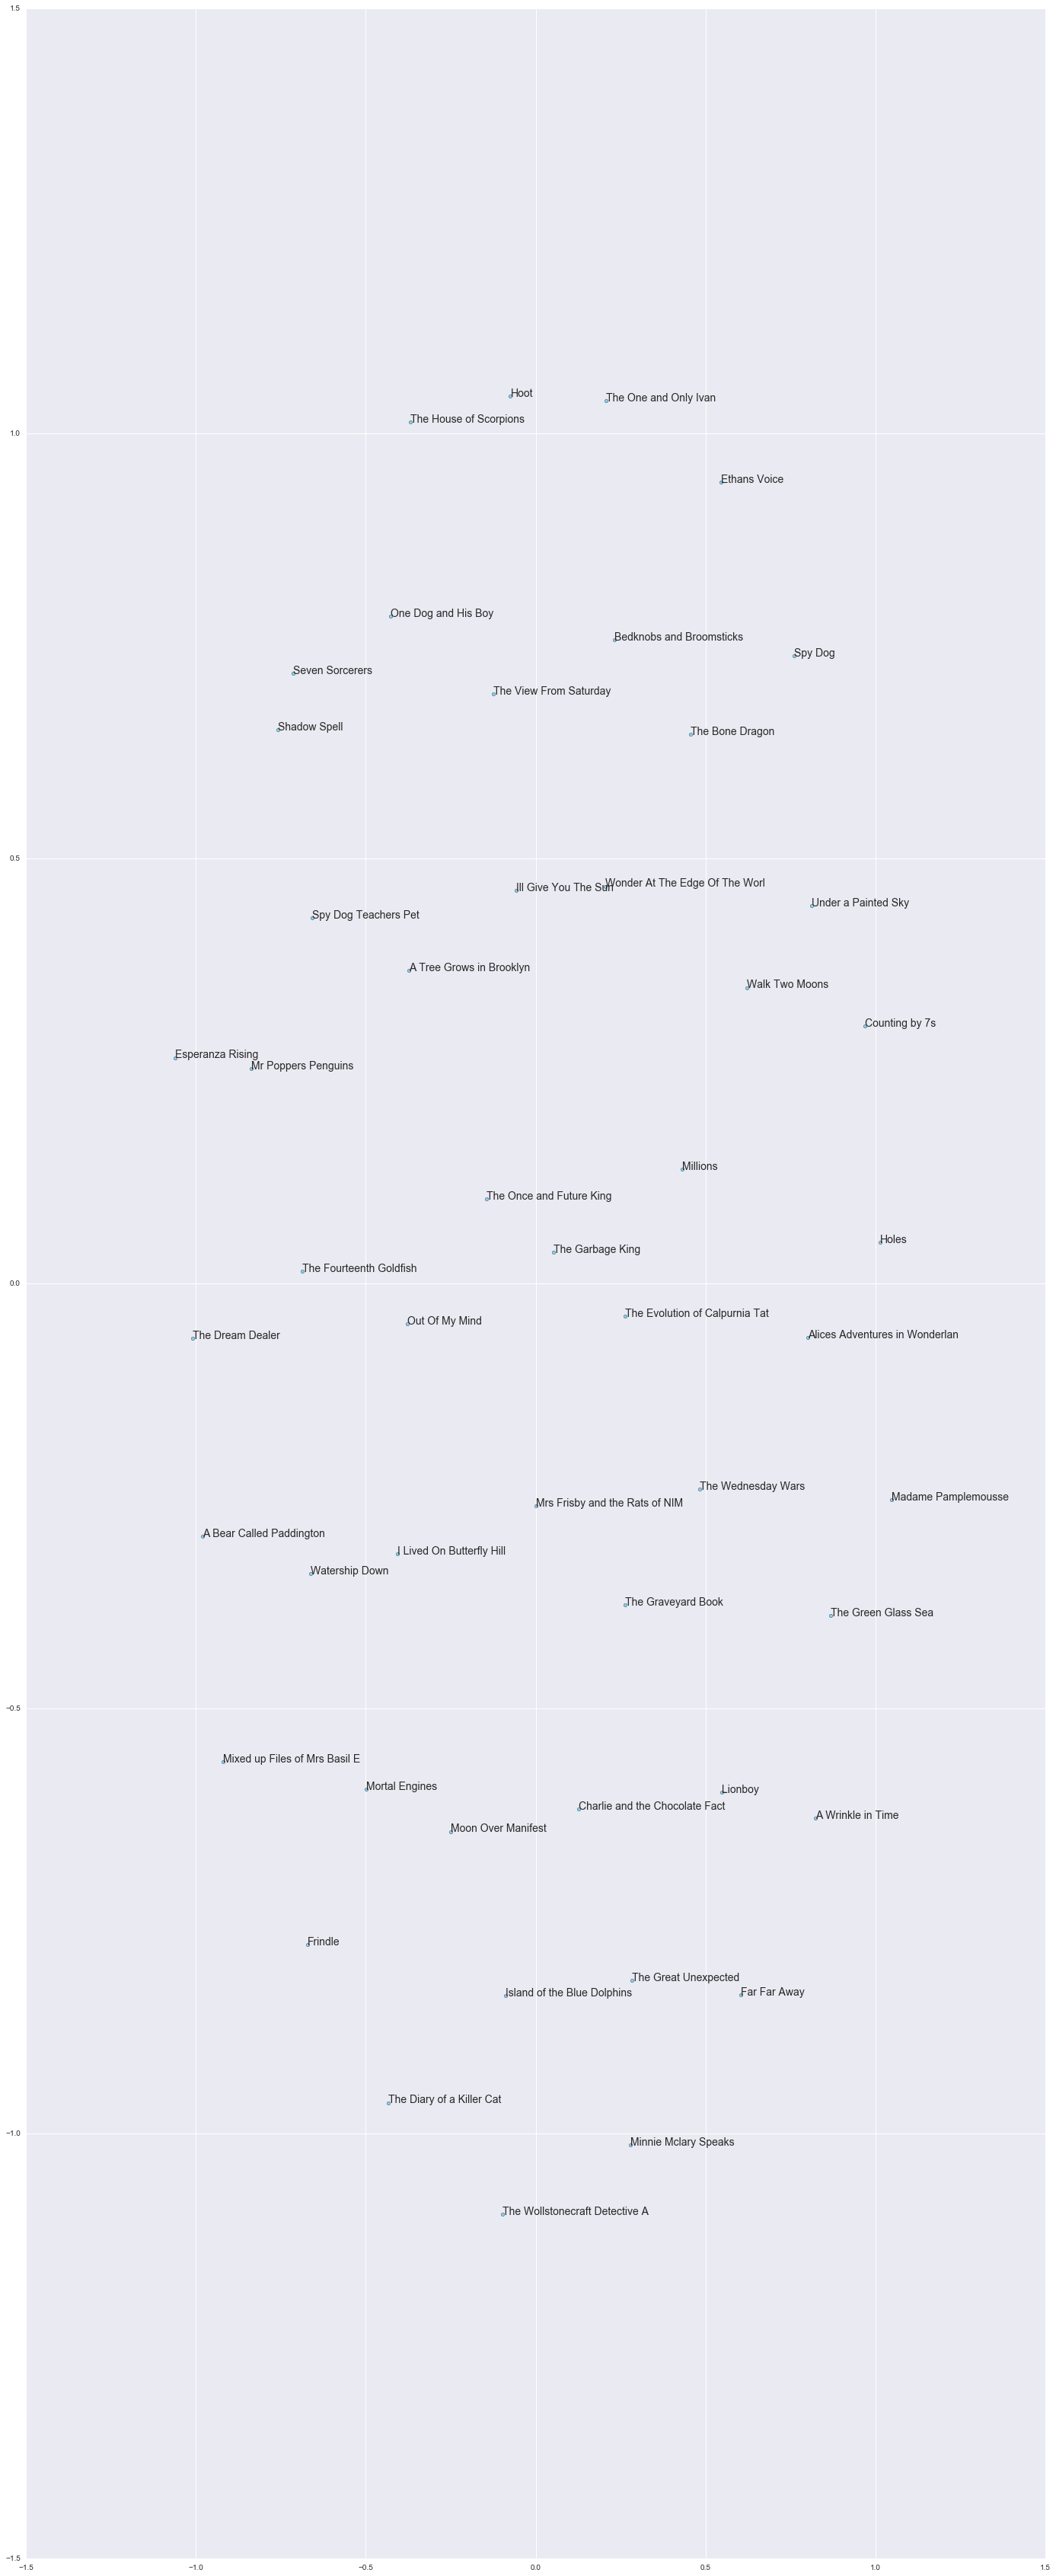

In [109]:
xs, ys = pos[:, 0], pos[:, 1]

#short versions of filenames
shortnames = [fn[:30] for fn in mgbooknames]

plt.figure(figsize=(24,60))
# color-blind-friendly palette
for x, y, name in zip(xs,ys,shortnames):
    #color = 'orange' if "Austen" in name else 'skyblue'
    color = 'skyblue'
    plt.scatter(x, y, c=color, marker='o')
    plt.text(x,y,name,fontsize=14)
plt.show()

In [110]:
# Also a 3d plot...
mds3 = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos3 = mds3.fit_transform(lsa_distances)  # shape (n_components, n_samples)

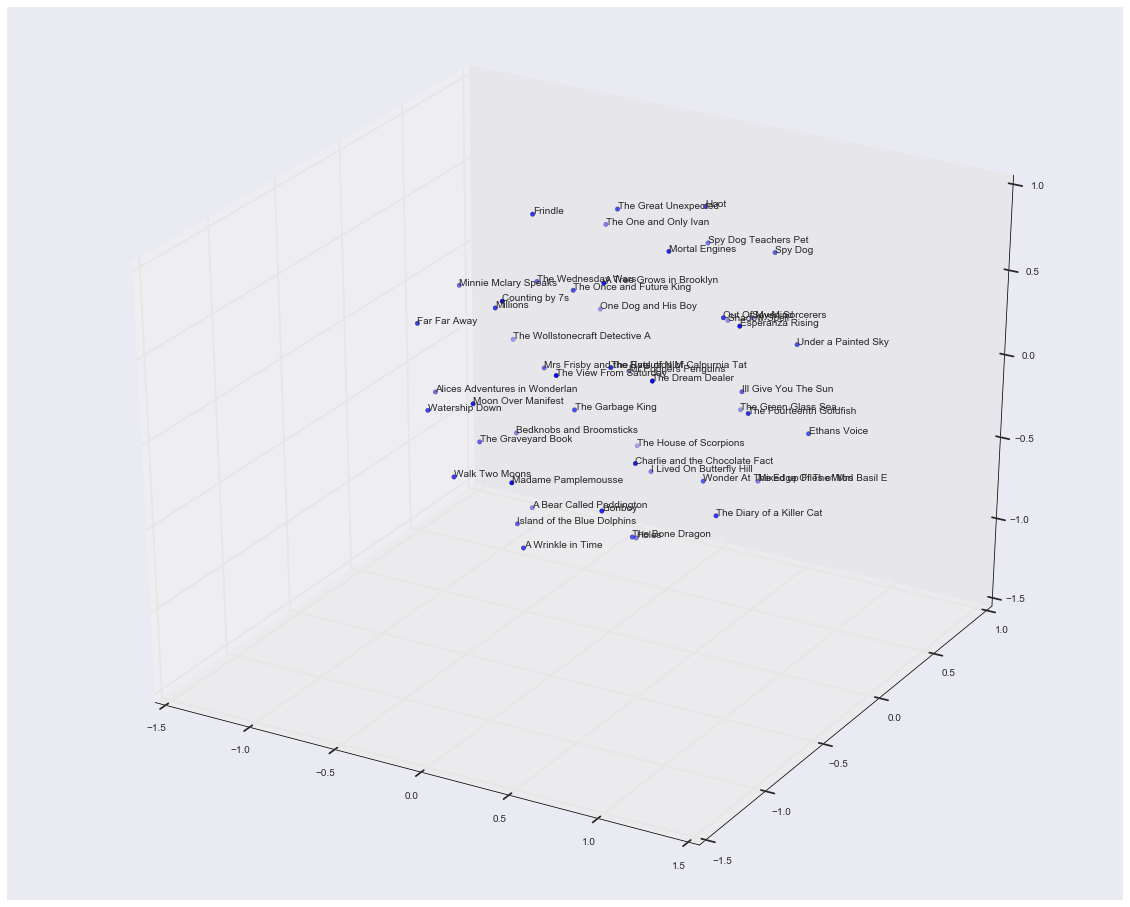

In [111]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(pos3[:,0],pos3[:,1],pos3[:,2])
for x,y,z,s in zip(pos3[:,0],pos3[:,1],pos3[:,2],shortnames):
    ax.text(x,y,z,s)

## Hierarchical Clustering Using Ward's Method

In [83]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(mg_distances)

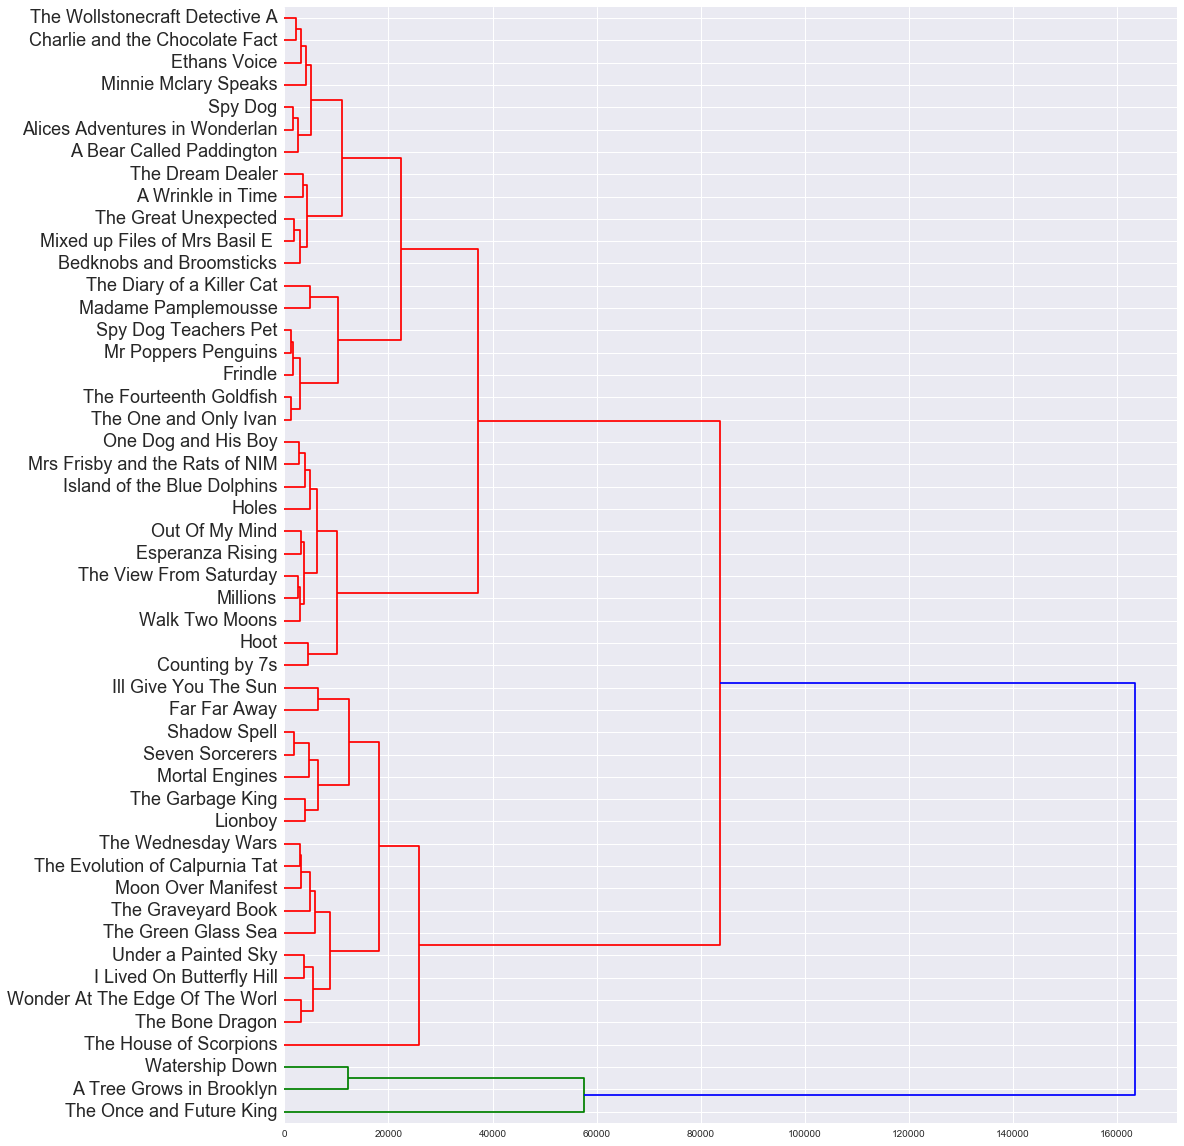

In [84]:
plt.figure(figsize=(16,20))
dendrogram(linkage_matrix, orientation="right", leaf_font_size = 18, labels=shortnames,show_leaf_counts=False)
#plt.tight_layout()
plt.show()

### Looking at the plots, 20 dimensions is probably good enough

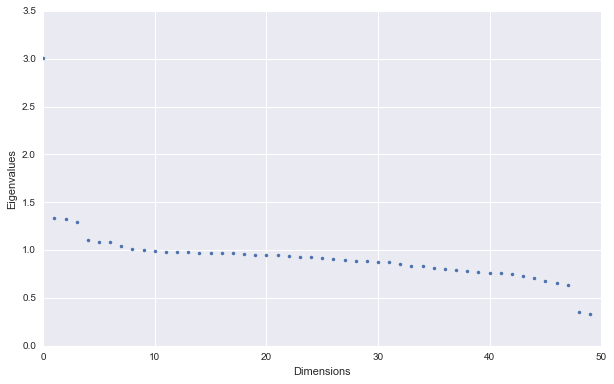

In [88]:
plt.figure(figsize = (10,6))
plt.plot(Sigma, '.')
plt.ylabel('Eigenvalues')
plt.xlabel('Dimensions');

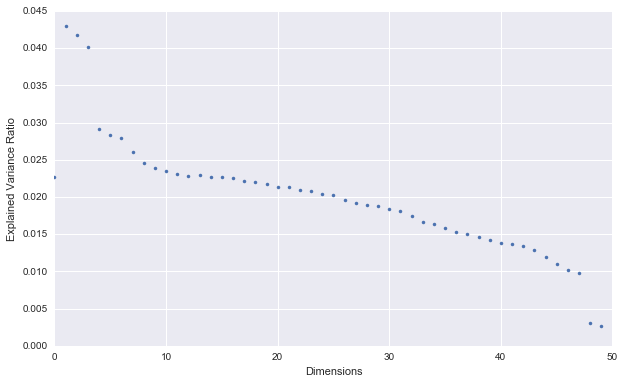

In [89]:
plt.figure(figsize = (10,6))
plt.plot(range(len(lsa.explained_variance_ratio_)), lsa.explained_variance_ratio_, '.')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Dimensions');

In [90]:
#Look at a few items from a topic
topic_num = 4
display_amount = 300
pprint(np.array(arrayoftokenizedpotterbooks[0])[np.argsort(dtm_lsa[:,topic_num])[-display_amount:]])

array(['to', 'because', 'LIVED', 'Dursley', 'Mrs.', 'involved', 'thank',
       'to', 'of', 'normal', 'last', 'CHAPTER', 'proud', 'very', 'THE',
       'say', 'in', 'number', 'hold', 'anything', 'Mr.', 'four', 'that',
       'perfectly', 'mysterious', 'didnt', 'youd', 'or', 'were', 'Privet',
       'you', 'they', 'and', 'expect', 'be', 'Drive', 'the', 'BOY', 'with',
       'just', 'were', '.', 'much', 'WHO', 'They', 'they', 'ONE', 'were',
       'strange', 'people'], 
      dtype='<U23')


In [64]:
#example = sent_tokenize(middlegradearray[0])
example = sent_tokenize(potterbooksarray[0])

# just creating our document-term matrix
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example) 
pd.DataFrame(dtm.toarray(), index=example, columns=vectorizer.get_feature_names()).head(10)

,10,100,101,102,103,104,105,106,107,108,...,youth,youve,yvonne,zabini,zigzagging,zombie,zoo,zoom,zoomed,zooming
CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mr. Dursley was the director of a firm called Grunnings which made drills.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
He was a big beefy man with hardly any neck although he did have a very large mustache.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
They didnt think they could bear it if anyone found out about the Potters.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mrs. Potter was Mrs. Dursleys sister but they hadnt met for several years; in fact Mrs. Dursley pretended she didnt have a sister because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
# truncate down to two dimensions then refit matrix
# 10 components too much - reducing to 6
lsa = TruncatedSVD(6, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [66]:
# this is our top short wide matrix
# and other words showing up on component 1
column_names = ["component_1","component_2","component_3",
                "component_4","component_5","component_6"]
#                 ,
#                 "component_7","component_8","component_9",
#                 "component_10"]
pd.DataFrame(lsa.components_.round(5),index = column_names,columns = vectorizer.get_feature_names())

,10,100,101,102,103,104,105,106,107,108,...,youth,youve,yvonne,zabini,zigzagging,zombie,zoo,zoom,zoomed,zooming
component_1,0.00009,-0.0,0.00027,0.00003,0.00002,0.00001,0.00013,0.00007,0.00065,0.00003,...,0.00009,0.00320,0.00000,0.00095,0.00064,0.00019,0.00234,0.00010,0.00063,0.00012
component_2,-0.00005,-0.0,0.00116,0.00007,0.00000,-0.00001,0.00005,0.00001,-0.00060,0.00002,...,0.00023,0.00484,0.00001,0.00075,-0.00058,-0.00001,-0.00055,0.00009,-0.00057,-0.00003
component_3,0.00020,-0.0,-0.00056,-0.00002,0.00009,-0.00000,0.00015,0.00013,-0.00023,0.00011,...,0.00007,0.00369,0.00000,0.00137,-0.00022,0.00023,-0.00174,0.00003,-0.00024,0.00026
component_4,0.00091,0.0,-0.00056,0.00024,0.00016,0.00010,0.00246,0.00062,0.00007,0.00020,...,0.00115,0.02569,0.00004,-0.00105,0.00001,0.00152,0.00145,0.00128,-0.00007,0.00105
component_5,-0.00012,0.0,0.00068,0.00033,0.00004,0.00004,0.00142,0.00043,0.00003,0.00021,...,0.00102,0.01729,0.00002,-0.00021,0.00017,0.00106,0.00349,0.00124,0.00013,0.00038
component_6,-0.00083,-0.0,0.00040,0.00068,-0.00002,-0.00003,-0.00159,-0.00036,-0.00002,-0.00004,...,-0.00024,-0.01057,0.00001,0.00008,0.00006,0.00126,-0.00703,0.00257,0.00012,-0.00048


In [67]:
array(vectorizer.get_feature_names())

array(['10', '100', '101', ..., 'zoom', 'zoomed', 'zooming'], 
      dtype='<U18')

In [68]:
pd.DataFrame(dtm_lsa.round(5), index = example, columns = column_names)

,component_1,component_2,component_3,component_4,component_5,component_6
CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much.,0.30253,0.10914,-0.06689,0.73590,0.49507,-0.32474
They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense.,0.21928,-0.01835,0.14496,0.76048,0.47471,-0.35622
Mr. Dursley was the director of a firm called Grunnings which made drills.,0.30371,0.11605,-0.15277,0.82043,0.43696,-0.08310
He was a big beefy man with hardly any neck although he did have a very large mustache.,0.33394,-0.00978,-0.10752,0.92307,0.13713,-0.07722
Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors.,0.30503,-0.00135,0.06238,0.78924,0.36255,-0.38563
The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.,0.25064,-0.00757,-0.16350,0.54940,0.34436,-0.69998
The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it.,0.32866,-0.04746,-0.11101,0.72130,0.38706,-0.45533
They didnt think they could bear it if anyone found out about the Potters.,0.24229,0.01085,0.11170,0.76264,0.46079,-0.36709
Mrs. Potter was Mrs. Dursleys sister but they hadnt met for several years; in fact Mrs. Dursley pretended she didnt have a sister because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be.,0.29106,-0.01579,0.05056,0.70519,0.44608,-0.46497
The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street.,0.28279,0.10429,-0.01857,0.82874,0.40067,-0.24792


In [69]:
[[example[i], dtm_lsa[i][0].round(5), dtm_lsa[i][1].round(5)] for i in range(len(example))]

[['CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much.',
  0.30253000000000002,
  0.10914],
 ['They were the last people youd expect to be involved in anything strange or mysterious  because they just didnt hold with such nonsense.',
  0.21928,
  -0.018350000000000002],
 ['Mr. Dursley was the director of a firm called Grunnings which made drills.',
  0.30370999999999998,
  0.11605],
 ['He was a big beefy man with hardly any neck although he did have a very large mustache.',
  0.33394000000000001,
  -0.0097800000000000005],
 ['Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors.',
  0.30503000000000002,
  -0.0013500000000000001],
 ['The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
  0.25063999999999997,
  -

In [70]:
xs = [w[0].round(5) for w in dtm_lsa] 
ys = [w[1].round(5) for w in dtm_lsa]
c_[xs, ys]
# this is the topic vector - i.e. the reduced representation
# of the documents - BUT ONLY FOR FIRST TWO TOPICS?

array([[ 0.30253,  0.10914],
       [ 0.21928, -0.01835],
       [ 0.30371,  0.11605],
       ..., 
       [ 0.88791,  0.29822],
       [ 0.1919 ,  0.22963],
       [ 0.21489,  0.12946]])

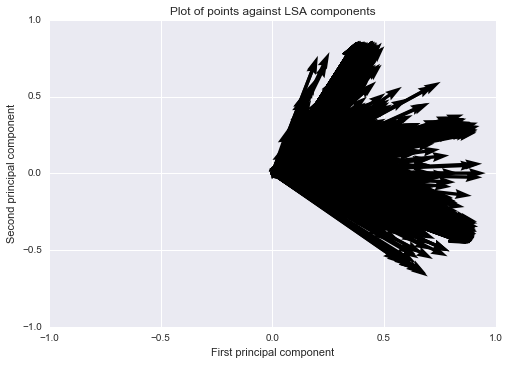

In [71]:
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) 
# ax.quiver(0,0,xs,ys,scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA components')
plt.draw()
plt.show()
# in the first example the documents are orthogonal to each other
# you could imagine this in a much higher dimensional space
# many things are based on idea of representing things as vectors
# and doing the cosine computation

In [72]:
dtm_lsa.shape

(6407, 6)

In [74]:
# THIS GIVES A MEMORY ERROR WITH ANY LARGER CORPUS

# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T) 

pd.DataFrame(similarity.round(5),index=example, columns=example).head(10)

,CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much.,They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense.,Mr. Dursley was the director of a firm called Grunnings which made drills.,He was a big beefy man with hardly any neck although he did have a very large mustache.,Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors.,The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.,The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it.,They didnt think they could bear it if anyone found out about the Potters.,Mrs. Potter was Mrs. Dursleys sister but they hadnt met for several years; in fact Mrs. Dursley pretended she didnt have a sister because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be.,The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street.,...,said Mrs. Weasley.,"In a manner of speaking, said Uncle Vernon.",Hurry up boy we havent got all day.,He walked away.,Harry hung back for a last word with Ron and Hermione.,"See you over the summer, then.","Hope you have -- er -- a good holiday, said Hermione looking uncertainly after Uncle Vernon shocked that anyone could be so unpleasant.","Oh, I will, said Harry and they were surprised at the grin that was spreading over his face.",They dont know were not allowed to use magic at home.,Im going to have a lot of fun with Dudley this summer....
CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much.,1.00000,0.96496,0.96183,0.87940,0.97348,0.88803,0.97196,0.97557,0.97373,0.98691,...,0.15955,0.42363,0.98457,0.68190,0.01384,0.84505,0.50911,0.17875,0.98068,0.91388
They were the last people youd expect to be involved in anything strange or mysterious because they just didnt hold with such nonsense.,0.96496,1.00000,0.90328,0.85240,0.98563,0.86202,0.95132,0.99860,0.98511,0.96616,...,-0.02592,0.26898,0.98092,0.72202,0.11410,0.83569,0.40648,0.01427,0.94683,0.90224
Mr. Dursley was the director of a firm called Grunnings which made drills.,0.96183,0.90328,1.00000,0.94037,0.92094,0.75961,0.91001,0.91533,0.89096,0.97643,...,0.13402,0.29919,0.94552,0.78000,-0.01887,0.72571,0.38181,0.16766,0.96542,0.77081
He was a big beefy man with hardly any neck although he did have a very large mustache.,0.87940,0.85240,0.94037,1.00000,0.90319,0.70976,0.87620,0.86430,0.83993,0.93449,...,-0.04075,0.11932,0.88970,0.85233,0.09533,0.55705,0.23740,0.09077,0.87377,0.65360
Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors.,0.97348,0.98563,0.92094,0.90319,1.00000,0.89466,0.97859,0.99139,0.98956,0.97991,...,0.01483,0.31069,0.98157,0.73324,0.13194,0.80094,0.43930,0.09481,0.94400,0.89802
The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.,0.88803,0.86202,0.75961,0.70976,0.89466,1.00000,0.94917,0.87701,0.93131,0.83994,...,0.10437,0.51518,0.87559,0.37197,-0.06791,0.76152,0.53427,0.15890,0.81524,0.95854
The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it.,0.97196,0.95132,0.91001,0.87620,0.97859,0.94917,1.00000,0.96231,0.98382,0.95579,...,0.03973,0.37230,0.95989,0.63167,0.03233,0.76139,0.44206,0.16007,0.91752,0.92032
They didnt think they could bear it if anyone found out about the Potters.,0.97557,0.99860,0.91533,0.86430,0.99139,0.87701,0.96231,1.00000,0.99004,0.97524,...,0.0

In [75]:
numpy.asmatrix(dtm_lsa)

matrix([[ 0.30252536,  0.10914227, -0.06688601,  0.73589694,  0.49506558,
         -0.32474359],
        [ 0.21927762, -0.01835465,  0.14495806,  0.76048073,  0.47470665,
         -0.35621658],
        [ 0.30371228,  0.11605381, -0.15276589,  0.82043388,  0.43696183,
         -0.08309962],
        ..., 
        [ 0.8879109 ,  0.29822382, -0.21099712, -0.26063684,  0.09937684,
         -0.01869961],
        [ 0.19189509,  0.22963263, -0.02537783,  0.78426742,  0.48863507,
         -0.23656178],
        [ 0.21488591,  0.12946311,  0.00294947,  0.50107188,  0.51752495,
         -0.64664484]])

### NMF

In [76]:
nmf_model = NMF(6)
dtm_nmf = nmf_model.fit_transform(dtm)
dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)

In [77]:
dtm.shape

(6407, 5867)

In [ ]:
# compare to the lsa similarity 
dtm_nmf.round(2)

In [ ]:
nmf_model.components_[:,:10].round(2)

In [ ]:
# this is the reconstruction of the matrix
np.dot(dtm_nmf,nmf_model.components_).round(2)#[0,370:380]
# typically people look at the other matrix that maps the topic to the
# words then that gives you a clearer understanding of what the topic
# is about 

## Story Generation
*** Generate story X in the style of story Y ***
* Style parameters: adjectives, activity/passivity of characters, sentiment of character interactions

In [54]:
def getNgramDisti(text,n):
    # return {ngram: {followon word: counts), ...} from corpus text.
    result = {}
    spltext = text.split()
    if n < 1:
        raiseValueError('n must be at least 1')
        
    for i in range(len(spltext)):
        if i + n + 1 < len(spltext):
            words = spltext[i:i+n+n]
            ngram = ' '.join(words[:-n]) # join all except last word
            ngramfollowon = ' '.join(words[-n:])
            if ngram in result:
                if ngramfollowon in result[ngram]:
                    result[ngram][ngramfollowon] += 1
                else:
                    result[ngram][ngramfollowon] = 1
            
            else:
                result[ngram] = {}
                result[ngram][ngramfollowon] = 1
    return result

In [55]:
potterNgram1 = getNgramDisti(potterbooksfile,1)
potterNgram2 = getNgramDisti(potterbooksfile,2)

In [56]:
# generate string of markov text taking distribution
# dictionary and length of output text in words
# as inputs
def markov_text(dictionary, n, nwords=100):
    import numpy as np
    result = ""
    if nwords < 1:
        raise ValueError('nwords must be greater than 1.')
    else:
        result = random.choice(list(dictionary.keys()))
        nwords -= 1
        for i in range(nwords):
            if result == result.split(" "):
                key = result
            else:
                key = result.split(" ")[-1]

            words = list(dictionary[key])

            probs = np.array([dictionary[key][word] for word in words],dtype=np.float32)
            probs /= probs.sum()

            # choose the next word based on the transition matrix
            newword = np.random.choice(words,p=probs)
            
            result += ' ' + newword

    return result

In [106]:
output_text = markov_text(potterNgram1,2500)
output_text

'police, quiet, and the office door. Their faces could be used to Hagrid. And then extracted a squeeze in. Dumbledore will have happened -- no idea... He had cured it with him and clammy. He did it. Im really do run with families. Oliver Wood. Er . Where they just in pieces. Gotta get some time we said Lupin. You must have been busy with Dean hurried off she bred in the castle. Theyre the next or so.” “So I can tell me... not to predict anything he had lived a grey hairs and forced out of the little beak,'

In [ ]:
adjectives = ['JJ','JJR','JJS','RB','RBR','RBS']
nouns = ['NN','NNS'] # not including proper nouns
verbs = ['VB','VBD','VBG','VBN','VBP','VBZ']

In [ ]:
bartverbs[410:415]

In [ ]:
bartadjectives[400:415]

In [ ]:
def substituteAdjectives(text,adjective_list):
    words = word_tokenize(text)
    tags = pos_tag(words)
    for tup in tags:
        if tup[1] in adjectives:
            # use markov process to pick adjectives from the other text

In [ ]:
substituteAdjectives(output_text,bartadjectives)

## Build A Character Relationship Network

In [90]:
names = pottopchars[:10]

In [91]:
# Formatting nodes and edge weights for network graphs:
nodes = pd.Series(names)
nodes_dict = nodes.to_dict()

nodes_dict = dict(zip(nodes_dict.values(),nodes_dict.keys()))

nodes_df = nodes.reset_index()
nodes_df.columns = ['Id', 'name']

In [92]:
def get_edges(bookdf):    
    edges = bookdf.sum()
    edges_weights = edges.to_frame(name='Weight').reset_index()
    edges_weights.columns = ['Label', 'Weight']
    edges_weights['Source_Label'] = edges_weights.Label.apply(lambda x: x[0])
    edges_weights['Target_Label'] = edges_weights.Label.apply(lambda x: x[1])
    edges_weights['Source'] = edges_weights.Source_Label.apply(lambda x: nodes_dict.get(x))
    edges_weights['Target'] = edges_weights.Target_Label.apply(lambda x: nodes_dict.get(x))
    return edges_weights

*** Print JSON for network graph file ***

In [94]:
def get_json(bookdf):    
    print('{ \n "nodes":[')
    for i in range(len(nodes_df)):
        print('{' + '"name":"{}",'.format(nodes_df.iloc[i,1]) + '"group":{}'.format(i) + '},')
    print('],')
    print('"links":[')
    for i in range(len(get_edges(bookdf))):
        print('{' + '"source":{},'.format(get_edges(bookdf).iloc[i,4]) + '"target":{},'.format(get_edges(bookdf).iloc[i,5]) + \
        '"value":{}'.format(int(get_edges(bookdf).iloc[i,1]) if int(get_edges(bookdf).iloc[i,1])>0 else 1) + '},')
    print(']\n}')

## Generate Sentences For Topic Modelling

In [53]:
def makesentences(text,person1,person2,format='array'):
    sentences = nltk.sent_tokenize(text)
    listresult = []
    blobresult = ""
    for sent in sentences:
        sent = sent.lower()
        if person1 in sent and person2 in sent:
                blobresult += sent
                blobresult += " "
                listresult.append(sent)
    if format == 'array':
        return listresult
    elif format == 'blob':
        return blobresult

In [ ]:
def grouped(iterable, n):
    "s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), (s2n,s2n+1,s2n+2,...s3n-1), ..."
    return zip(*[iter(iterable)]*n)

for x, y in grouped(l, 2):
   print "%d + %d = %d" % (x, y, x + y)

In [ ]:
def makesentences_mult(text,characterlist,n_sentences=1,format='array'):
    sentences = nltk.sent_tokenize(text)
    listresult = []
    blobresult = ""
    for idx, sent in enumerate(sentences):
        sent = sent.lower()
        if set(characterlist) <= set(sent):
                blobresult += sent
                blobresult += " "
                listresult.append(sent)
    if format == 'array':
        return listresult
    elif format == 'blob':
        return blobresult

In [ ]:
harryronsents = makesentences(potterbooksfile,'harry','ron')


# harryhagridsents = makesentences(blob1,'harry','hagrid')
# hermioneronsents = makesentences(blob1,'hermione','ron')

In [ ]:
harryronsents[15]

In [ ]:
print('Done')

#### Collecting TextBlob sentiment scores for each text segment mentioning "harry" and "snape":
This function returns only the text between positions where the 2 character names appear within n (non-"stop") words of each other spliced together:

In [95]:
def get_positions(book,chap,name1,name2,n_distance):
    words = [w for w in word_tokenize(books[book].iloc[chap,0]) if w not in stop if w.isalpha()==True]
    if name1 in words and name2 in words:
        name1_indexes = [index for index, value in enumerate(words) if value == name1]    
        name2_indexes = [index for index, value in enumerate(words) if value == name2]    
        pairs=[(item[0],item[1]) for item in itertools.product(name1_indexes, name2_indexes) if abs(item[0] - item[1])<n_distance]
        if pairs!=[]:
            return [x for y in [words[min(pairs[i]):max(pairs[i])+1] for i in range(len(pairs))] for x in y]
        else:
            return (0,0)
    else:
        return (0,0)   

In [101]:
# this takes a little while - just a bit too long actually
books = th.loadpotterdataframes()
sentiment = []
harrysnape = defaultdict(list)
for b in range(len(books)):
    for chap in range(len(books[b])):
        if get_positions(b,chap,'harry','snape',120)==(0,0):
            sentiment.append(0)
        else:
            sentiment.append(TextBlob(' '.join(get_positions(b,chap,'harry','snape'))).sentiment.polarity)
            harrysnape[b].append(' '.join(get_positions(b,chap,'harry','snape')))

KeyboardInterrupt: 

#### Processing TF-IDF word rankings (for n-grams of size 1-6) for text segments between "harry" and "snape":

In [ ]:
splice = []
splice+=[' '.join(v) for v in harrysnape.values()]

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,6))
doc_vectors = vectorizer.fit_transform(splice)
mat_array = doc_vectors.toarray()
fn = vectorizer.get_feature_names()

In [ ]:
topwords  =pd.DataFrame()
for i,l in enumerate(mat_array): 
    topwords[i] = [(fn[x],l[x]) for x in (l*-1).argsort() if 'harry' not in fn[x].split() if 'snape' not in fn[x].split()][:80]

Isolate tf-idf probabilities for "meaningful" words:

In [ ]:
goodwords = pd.DataFrame(columns=[0,1,2,3,4])
goodwords.loc[0] = pd.Series([tup[1] for tup in topwords[0].iloc[[11,16,21,32,33]].values])
goodwords.loc[1] = pd.Series([tup[1] for tup in topwords[1].iloc[[6,8,10,17,42]].values])
goodwords.loc[2] = pd.Series([tup[1] for tup in topwords[2].iloc[[6,23,36,42,48]].values])
goodwords.loc[3] = pd.Series([tup[1] for tup in topwords[3].iloc[[11,15,21,32,37]].values])
goodwords.loc[4] = pd.Series([tup[1] for tup in topwords[4].iloc[[5,9,14,22,26]].values])
goodwords.loc[5] = pd.Series([tup[1] for tup in topwords[5].iloc[[7,17,30,53,56]].values])
goodwords.loc[6] = pd.Series([tup[1] for tup in topwords[6].iloc[[7,26,48,61,71]].values])

Isolate and format words associated with tf-idf scores:

In [ ]:
l0 = [str(tup[0]) for tup in topwords[0].iloc[[11,16,21,32,33]].values]
l1 = [str(tup[0]) for tup in topwords[1].iloc[[6,8,10,17,42]].values]
l1[3] = 'malfoy\nbent\nwhispered'
l2 = [str(tup[0]) for tup in topwords[2].iloc[[6,23,36,42,48]].values]
l2[3] = 'stayed\nsilent'
l3 = [str(tup[0]) for tup in topwords[3].iloc[[11,15,21,32,37]].values]
l4 = [str(tup[0]) for tup in topwords[4].iloc[[5,9,14,22,26]].values]
l5 = [str(tup[0]) for tup in topwords[5].iloc[[7,17,30,53,56]].values]
l6 = [str(tup[0]) for tup in topwords[6].iloc[[7,26,48,61,71]].values]
l6[2] = 'dumbledore\ntrusted'
wordlabels = [l0,l1,l2,l3,l4,l5,l6]

### Plot n-gram Score

In [ ]:
from matplotlib import cm
ax = goodwords.plot(kind='barh',stacked=True,figsize=(15,10),yticks=range(7),
                  fontsize=16,legend=False,cmap=plt.cm.autumn,width=0.85)
ax.set_yticklabels(["Sorcerer's Stone",'Chamber of Secrets','Prisoner of Azkaban','Goblet of Fire',
                    'Order of the Phoenix','Half Blood Prince','Deathly Hallows'],rotation=45,fontsize=15)
ax.set_axis_bgcolor('white')
ax.set_xlabel('tf-idf Score',fontsize=19)
ax.set_title('tf-idf n-gram Score between Harry and Snape',fontsize=30,weight='bold')
ax.xaxis.labelpad = 15

for i, label in enumerate(l0):
    ax.annotate(label, (goodwords.iloc[0,:i].sum()+0.0009,-0.32),fontsize=16,weight='bold')
for i, label in enumerate(l1):
    ax.annotate(label, (goodwords.iloc[1,:i].sum()+0.0009,.62),fontsize=16,weight='bold')
for i, label in enumerate(l2):
    ax.annotate(label, (goodwords.iloc[2,:i].sum()+0.0009,1.62),fontsize=16,weight='bold')
for i, label in enumerate(l3):
    ax.annotate(label, (goodwords.iloc[3,:i].sum()+0.0009,2.6),fontsize=16,weight='bold')
for i, label in enumerate(l4):
    ax.annotate(label, (goodwords.iloc[4,:i].sum()+0.0009,3.635),fontsize=16,weight='bold')
for i, label in enumerate(l5):
    ax.annotate(label, (goodwords.iloc[5,:i].sum()+0.0009,4.65),fontsize=16,weight='bold')
for i, label in enumerate(l6):
    ax.annotate(label, (goodwords.iloc[6,:i].sum()+0.0009,5.62),fontsize=16,weight='bold')

#### Generating topics (using LDA) on the text where 2 characters appear together:

In [ ]:
def get_topics(book,name1,name2):
    for chap in range(len(books[book])):
        if get_positions(book,chap,name1,name2)!=(0,0):
            words = get_positions(book,chap,name1,name2) 
            vectorizer = CountVectorizer(stop_words = "english")
            doc_vecs = vectorizer.fit_transform(words)
            vocab = vectorizer.get_feature_names()

            model = lda.LDA(n_topics=4, n_iter=300,random_state=1)
            model.fit(doc_vecs)
            topic_word = model.topic_word_  
            doc_topic=model.doc_topic_
            n_top_words = 10

            for i, topic_dist in enumerate(topic_word):
                topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
                print('Book {} Chapter {} Topic {}: {}'.format(book+1, chap+1, i+1, ' '.join(topic_words)))

Need to find a way of selecting topics that adequately represent interactions/theme between two characters:

#### Creating a "rolling mean" for sentiment scores to establish a timeline showing sentiment and topics each chapter:

In [ ]:
df = pd.DataFrame(sentiment,columns=['score'])
df['rolling'] = pd.rolling_mean(df['score'],window=35,min_periods=1,center=True)
df.to_csv('test.csv')

In [ ]:
alltopics = []
alltopics.extend(t for t in booktopics)
alltopics = [x for y in alltopics for x in y]
alltopics = [str(i) for i in alltopics]
alltopics = ['No interaction' if x=='' else x for x in alltopics]

In [ ]:
lens = [0, 17, 35, 57, 94, 132, 162, 199]

fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(1, 1, 1)
ax.set_axis_bgcolor('white')
y = list(df['rolling'])
ax.set_title('Interaction Sentiment and Topics over Time: Harry and Snape',fontsize=26)
ax.set_xlabel('Books by chapter',fontsize=15)
ax.set_ylabel('Sentiment Score (moving average)',fontsize=15)
colors=['r','orange','y','g','c','b','k']
booklist=["Book 1: Sorcerer's Stone","Book 2: Chamber of Secrets","Book 3: Prisoner of Azkaban","Book 4: Goblet of Fire",
          'Book 5: Order of the Phoenix',"Book 6: Half Blood Prince","Book 7: Deathly Hallows"]
for i in range(1,8):
    lines=ax.plot(range(lens[i-1],lens[i]),y[lens[i-1]:lens[i]],marker='o',c=colors[i-1],label=booklist[i-1])
    mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip(lines[0],labels=alltopics[lens[i-1]:lens[i]+1],voffset=20,hoffset=30))
ax.plot(range(200),[0]*200,'-',color='k')
ax.yaxis.grid()
ax.yaxis.labelpad = 10
plt.legend(loc="upper left",prop={'size':13})
plt.tight_layout()
#mpld3.display()
mpld3.enable_notebook()
#print (mpld3.fig_to_html(fig,use_http=True))

## Non-fiction Book Knowledge Map

In [ ]:
print("done")

## LDA Topic Modeling Using Gensim

In [128]:
# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
# logging for gensim (set to INFO)
import logging
# telling it to log all the info statements cause gensim takes a long time
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [129]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [130]:
doc_term_vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3),
                                  stop_words= stophr, #'english',
                                  token_pattern='\\b[a-z][a-z]+\\b',min_df=2)

In [131]:
# raw frequency, boolean frequency, logarithmically scaled 
doc_term_vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,3),
                                  stop_words= 'english',
                                  token_pattern='\\b[a-z][a-z]+\\b',min_df=2)

In [132]:
# fit to some sentences
doc_term_vectorizer.fit(potterbooksfile.split())

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='\\b[a-z][a-z]+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [133]:
potterbooksfile[:350]

'CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much. They were the last people youd expect to be involved in anything strange or mysterious  because they just didnt hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings which m'

In [134]:
doc_term_vectorizer.get_feature_names()[:15]
#len(doc_term_vectorizer.get_feature_names())

['aaaaargh',
 'aaaah',
 'aaah',
 'aaargh',
 'aargh',
 'ab',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abashed',
 'abated',
 'abbott',
 'abercrombie',
 'aberforth']

In [135]:
# Create the term-document matrix
# Transpose it so the terms are the rows
# this sparse form is not very memory intensive
terms_docs = doc_term_vectorizer.transform(potterbooksfile).transpose()
#terms_docs

In [136]:
terms_docs.shape

(15172, 6092106)

In [137]:
# Convert sparse matrix of counts to a gensim corpus
# this is actually creating an iterable that will deliver a 
# row of our sparse corpus to the model each time it is called
corpus = matutils.Sparse2Corpus(terms_docs)

In [138]:
id2word = dict((v, k) for k, v in doc_term_vectorizer.vocabulary_.items())

In [ ]:
# Create lda model (equivalent to "fit" in sklearn)
# we're starting with 3 topics cause we know there's 3 topics
# this is an iterative algorithm so need to tell it how many passes
# over the data - starts with a guess at your alpha and beta and iterates
# in terms of number of passes - keep an eye on the perplexity number
# this is kind of like the entropy - i.e. how surprising are these words
# given my model

# this may take some time if your corpus is large
# its an np-hard problem = non-deterministic polynomial time
# cutting passes down to 2 to see if I can make it work - still takes forever - abandoning
lda = models.LdaModel(corpus=corpus,num_topics=5,id2word=id2word, passes=20)

In [ ]:
#lsi = models.LsiModel(corpus=corpus,num_topics=3,id2word=id2word)

In [ ]:
# using harry and ron as stopwords as well as regular stopwords
lda.print_topics(num_words=16, num_topics=5)

In [ ]:
# next step is to map characters into topics - 
# so just see how often characters occur or co-occur in these topics

## Gensim & Word2Vec Setup

In [ ]:
# Create an iterator Class that can be used as a gensim corpus 
# (defines how to read in the text data)
class MySentences(object):
     def __init__(self, dirname):
        self.dirname = dirname
 
     def __iter__(self):
         for fname in os.listdir(self.dirname):
                for line in open(os.path.join(self.dirname, fname),encoding="latin-1"):
                    yield line.split()
                    
# Instantiate the corpus from a text file of documents
# sentences = MySentences('/Users/jeffcoggshall/nltk_data/corpora/gutenberg') 
bartsentences = MySentences(bartbooksfile)

# Create a Word2vec model
w2v = Word2Vec(sentences,min_count=3,workers=5)

In [ ]:
# Words close to woman and king but not man
w2v.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)

## Add TF-IDF for purpose of weighting w2v results

In [ ]:
print("Done")

## Book Summary

In [ ]:
# Need a training set of "blurbs"
# Failing that I suppose we could try to come up with the most "representative"
# sentences in the book relative to the entire corpus?
# look at the gensim and tensorflow tutorials - an email from caiya?